In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
import random
import os
from IPython.display import clear_output
plt.style.use('ggplot')

<h1> Attack Section: Code </h1>

In [99]:
# Defining a function to print the number of rounds I won & probability of me winning given any n x n matrix

def game_print(dim, iterations, no):
    rounds_won = 0
    for i in range(iterations):
        grid = np.zeros((dim,dim), int)
        choices = np.random.choice(grid.size, (dim*dim)//2, replace=False)
        grid.ravel()[choices] = no
        det = linalg.det(grid)
        if(det == 0):
            rounds_won += 1
    print(f'Rounds I won: {rounds_won}')
    print(f'Percentage chance of me winning: {round(100*rounds_won/iterations,2)}%')
    
# Defining a function to find the probability of me winning given any n x n matrix

def game_perc_rounds_won(dim, iterations, no):
    '''Function to find chance of me winning given any n'''
    rounds_won = 0
    for i in range(iterations):
        grid = np.zeros((dim,dim), int)
        choices = np.random.choice(grid.size, (dim*dim)//2, replace=False)
        grid.ravel()[choices] = no
        det = linalg.det(grid)
        if(det == 0):
            rounds_won += 1
    return rounds_won/iterations


In [100]:
# An example of the output for the 'game_print' function

game_print(15,1000,1)

Rounds I won: 13
Percentage chance of me winning: 1.3%


<h1> Finding an optimal strategy so I can win </h1>

In [88]:
# So far, this strategy guarantees that I can win (given an even integer n dimension)

dim = 4
grid = np.zeros((dim,dim), int)
for i in range(dim):
    for j in range(dim):
        if(grid[i][j] == 0):
            grid[i][j] = -1 
move = 0
while(move < dim**2 + 1):
    clear_output(wait = True)
    x = int(input('What row would you like to place a 1? '))
    y = int(input('What column would you like to place a 1? '))
    if(grid[x][y] != -1):
        print(f'The coordinate you have entered is wrong, please enter a coordinate in the following list: {np.argwhere(grid == -1)}')
    else: 
        grid[x][y] = 1
    print(grid, "\n")
    move += 1
    #now logic for the optimal 0 strategy:
    if(dim - 4 <= y < dim):
        if(y == dim - 4):
            grid[x][dim - 3] = 0
        elif(y == dim - 3):
            grid[x][dim - 4] = 0
        elif(y == dim - 2):
            grid[x][dim - 1] = 0
        elif(y == dim - 1):
            grid[x][dim - 2] = 0
    else: 
        possibles = np.argwhere(grid[:,0:dim - 4] == -1)
        x1 = possibles[0][0]
        y1 = possibles[0][1]
        grid[x1][y1] = 0
    print(grid, "\n")
    move += 1
    
    
det = linalg.det(grid)
if(det == 0):
    print('You lose!')
else:
    print('You win!')

ValueError: invalid literal for int() with base 10: ''

<h1> Extension Part 1 </h1>

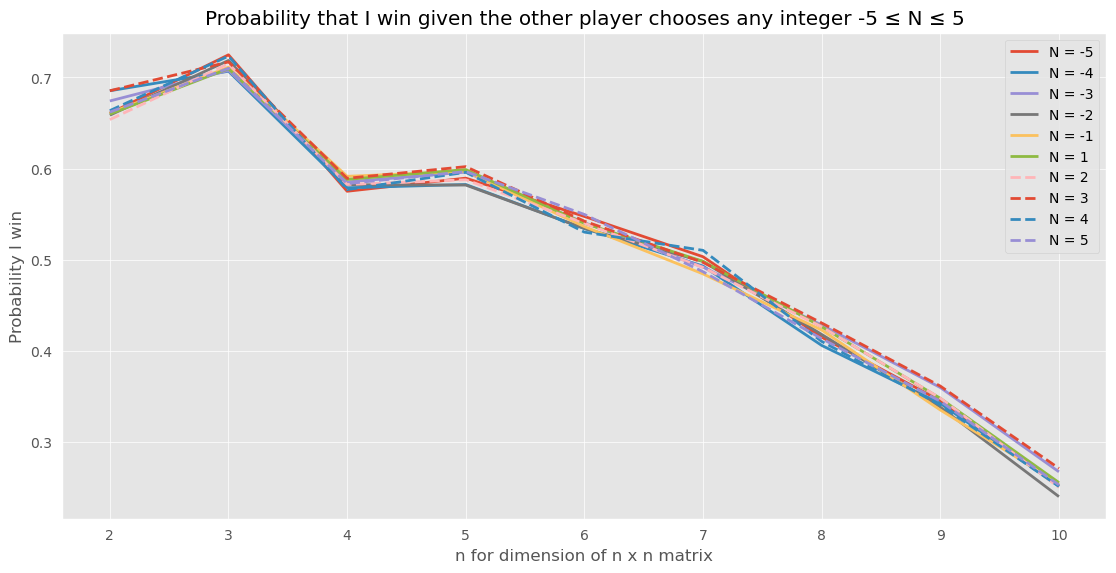

In [101]:
# Extension: What if the other player can input any integer N (not just 1)?
# What is the probability of me winning now, given any N chosen by the other player? (here we will just take between -5 and 5 for simplicity)

random.seed(int.from_bytes(os.urandom(16), 'big'))
iterations = 5000
a = 2
b = 11
x = [i for i in range(a,b)]
plt.figure(figsize = (12,6))
for j in range(-5,6):
    no = j
    percs = []
    if(j != 0):
        for i in range(a,b): # taking dimension of matrix to be between 2 and 10 as an example
            random.seed(int.from_bytes(os.urandom(16), 'big'))
            percs.append(game_perc_rounds_won(i, iterations, no))
        if(j > 1):
            plt.plot(x, percs, '--', lw = 2, label = f'N = {no}')
        else:
            plt.plot(x, percs, lw = 2, label = f'N = {no}')
plt.legend()
plt.title('Probability that I win given the other player chooses any integer -5 ≤ N ≤ 5')
plt.ylabel('Probability I win')
plt.xlabel('n for dimension of n x n matrix')
plt.show()

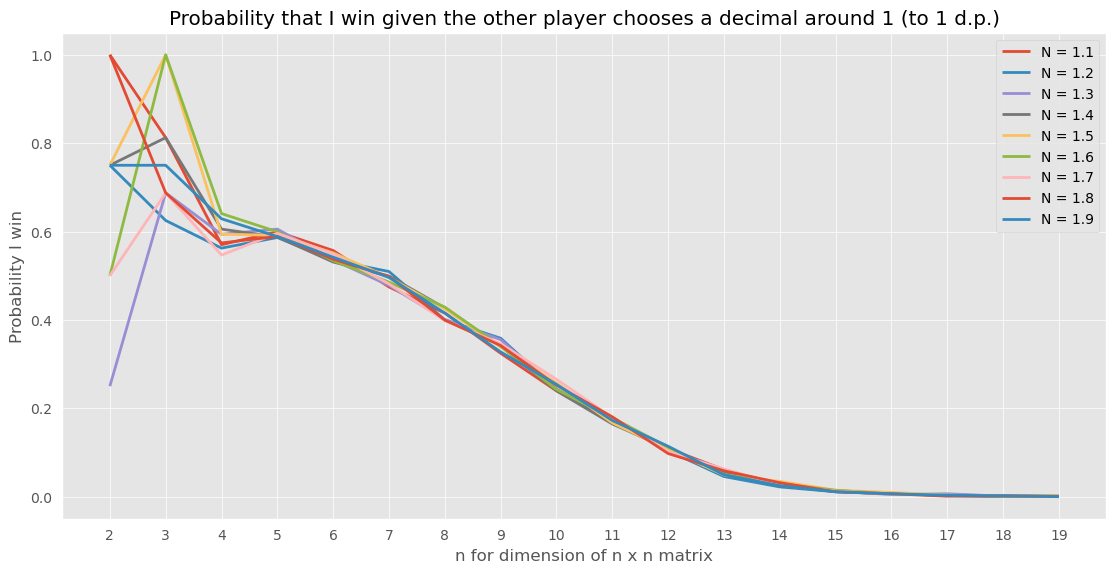

In [114]:
# Now let's introduce an upper limit to the number of iterations, based on my conjecture (for the total number of unique matrix possibilities)
# We will now also explore if the other player uses DECIMALS (to 1 decimal place) instead of integers only!
# Let's take these decimals around 1, to see how the behaviour compares to when 1 itself is chosen

random.seed(int.from_bytes(os.urandom(16), 'big'))
max_iters = 2000
a = 2
b = 20
decimals = [1 + 0.1*i for i in range(0,10)] #[0.5+0.1*i for i in range(2,11)]
x = [i for i in range(a,b)]
plt.figure(figsize = (12,6))
for j in range(len(decimals)):
    no = decimals[j]
    percs = []
    if(j != 0):
        for i in range(a,b):
            ch = (i*i)//2
            iterations = 2**ch
            iterations = np.asarray([iterations, max_iters]).min()
            random.seed(int.from_bytes(os.urandom(16), 'big'))
            percs.append(game_perc_rounds_won(i, iterations, no))
        if(j > 1):
            plt.plot(x, percs, lw = 2, label = f'N = {round(no,2)}')
        else:
            plt.plot(x, percs, lw = 2, label = f'N = {round(no,2)}')
plt.legend()
plt.title('Probability that I win given the other player chooses a decimal around 1 (to 1 d.p.)')
plt.ylabel('Probability I win')
plt.xlabel('n for dimension of n x n matrix')
plt.xticks(x)
plt.show()

In [112]:
game_print(5, 2000, 0.9)

Rounds I won: 2000
Percentage chance of me winning: 100.0%


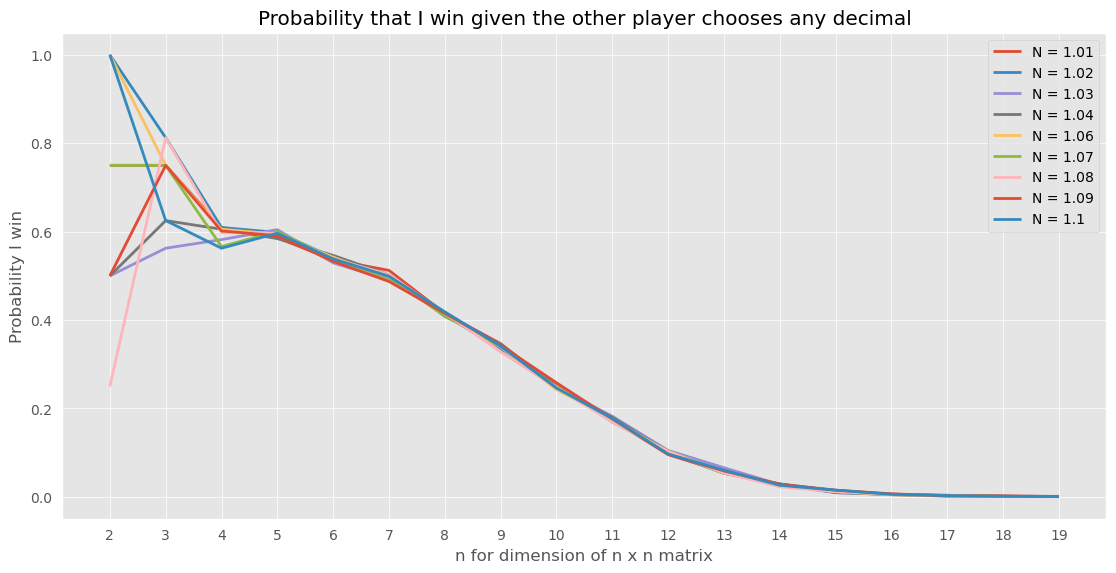

In [113]:
# Now let's use np.linspace to pick whatever decimal we wish for the other player 

random.seed(int.from_bytes(os.urandom(16), 'big'))
max_iters = 5000
a = 2
b = 20
x = [i for i in range(a,b)]
decimals = np.linspace(1,1.1,10)
plt.figure(figsize = (12,6))
for j in range(len(decimals)):
    no = decimals[j]
    percs = []
    if(j != 0):
        for i in range(a,b):
            ch = (i*i)//2
            iterations = 2**ch
            iterations = np.asarray([iterations, max_iters]).min()
            random.seed(int.from_bytes(os.urandom(1), 'big'))
            percs.append(game_perc_rounds_won(i, iterations, no))
        if(j > 1):
            plt.plot(x, percs, lw = 2, label = f'N = {round(no,2)}')
        else:
            plt.plot(x, percs, lw = 2, label = f'N = {round(no,2)}')
plt.legend()
plt.title('Probability that I win given the other player chooses any decimal')
plt.ylabel('Probability I win')
plt.xlabel('n for dimension of n x n matrix')
plt.xticks(x)
plt.show()

<h1> Let's see what the matrices would look like! </h1>

In [ ]:
# Original Game - example of a matrix

dim = 4
grid = np.zeros((dim,dim), int)
choices = np.random.choice(grid.size, (dim*dim)//2, replace=False)
grid.ravel()[choices] = 1

linalg.det(grid), grid

In [ ]:
# Modified Game: Where both players can choose any real number for their turns

n1 = -1
for i in range(dim):
    for j in range(dim):
        if(grid[i][j] == 0):
            grid[i][j] = n1
            
linalg.det(grid), grid

<h1> Extension Part 2: Let's Reimagine the Game Rules </h1>

In [104]:
# Based on the modified game mentioned above, let's define some new rules for our game.
# Both players can choose ANY real number for their turns.
# If the matrix determinant is positive, then I win. If it is negative, the other player wins.

def game2_print(dim, n1, n2): # I choose a real number n1, and the other player chooses a real number n2
    '''Code to run second version of game in which both players can choose their number'''
    rounds_won = 0
    ch = (dim*dim)//2
    iterations = 2**ch
    iterations = np.asarray([iterations, max_iters]).min()
    for i in range(iterations):
        grid = np.zeros((dim,dim), int)
        choices = np.random.choice(grid.size, (dim*dim)//2, replace=False)
        grid.ravel()[choices] = n2
        det = linalg.det(grid)
        if(det > 0):
            rounds_won += 1
    print(f'Rounds won: {rounds_won}')
    print(f'Percentage chance of winning: {round(100*rounds_won/iterations,2)}')
    
def game2_perc_rounds_won(dim, n1, n2): 
    rounds_won = 0
    ch = (dim*dim)//2
    iterations = 2**ch
    iterations = np.asarray([iterations, max_iters]).min()
    for i in range(iterations):
        grid = np.zeros((dim,dim), int)
        choices = np.random.choice(grid.size, (dim*dim)//2, replace=False)
        grid.ravel()[choices] = n1
        for i in range(dim):
            for j in range(dim):
                if(grid[i][j] == 0):
                    grid[i][j] = n2
        det = linalg.det(grid)
        if(det > 0):
            rounds_won += 1
    return rounds_won/iterations

In [ ]:
# Example output for the reimagined game

game2_print(5, 1, -1)

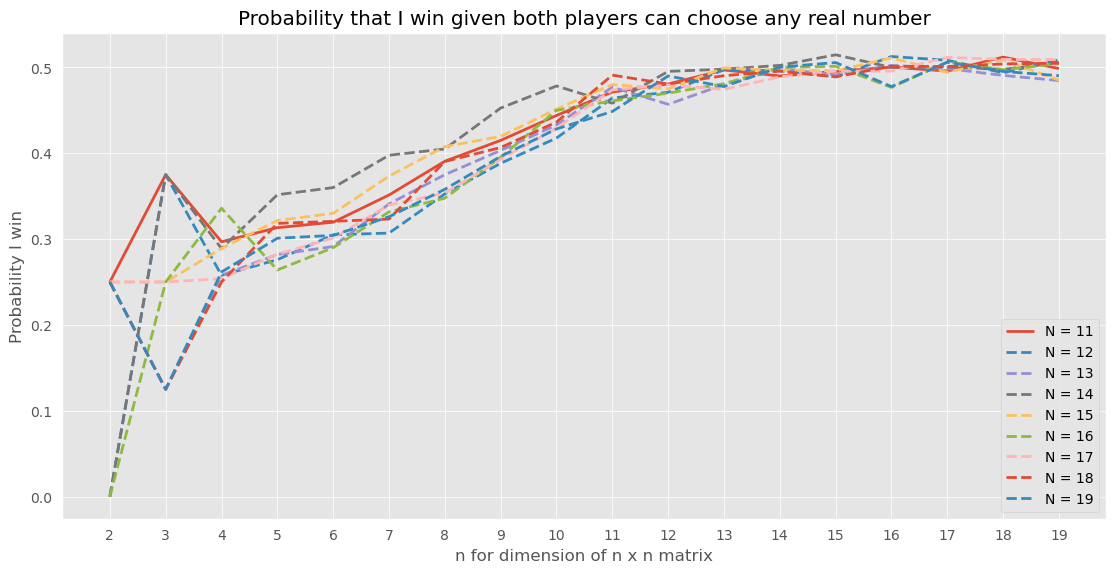

In [105]:
# Finally, let's do the same as above but with iterations over multiple games and matrices of different dimensions.
# Again, both players can choose any real number (and we will iterate through these choices)

random.seed(int.from_bytes(os.urandom(1), 'big'))
max_iters = 3000
a = 2
b = 20 # b-1 is the maximum dimension of our matrix
M = -10
n = [i for i in range(10,20)]
x = [i for i in range(a,b)]
plt.figure(figsize = (12,6))
for j in range(len(n)):
    no = n[j]
    percs = []
    if(j != 0):
        for i in range(a,b):
            random.seed(int.from_bytes(os.urandom(1), 'big'))
            percs.append(game2_perc_rounds_won(i, M, no))
        if(j > 1):
            plt.plot(x, percs, '--', lw = 2, label = f'N = {round(no,2)}')
        else:
            plt.plot(x, percs, lw = 2, label = f'N = {round(no,2)}')
plt.legend()
plt.title('Probability that I win given both players can choose any real number')
plt.ylabel('Probability I win')
plt.xlabel('n for dimension of n x n matrix')
plt.xticks(x)
plt.show()